In [9]:
import os

os.chdir('/home/jwdase/projects/language-detection/src')

In [10]:
import pickle

with open('notebooks/play/files.pkl', 'rb') as f:
    data = pickle.load(f)


In [11]:
data.keys()

dict_keys(['ta', 'en', 'es', 'ja', 'it', 'de', 'nl'])

In [12]:
import numpy as np

In [13]:
total = {}

for lang, dataset in data.items():
    total[lang] = {key : [] for key in data['en']['train'].keys()}
    for dtype, time_data in dataset.items():
        for time, files in time_data.items():
            total[lang][time] += files

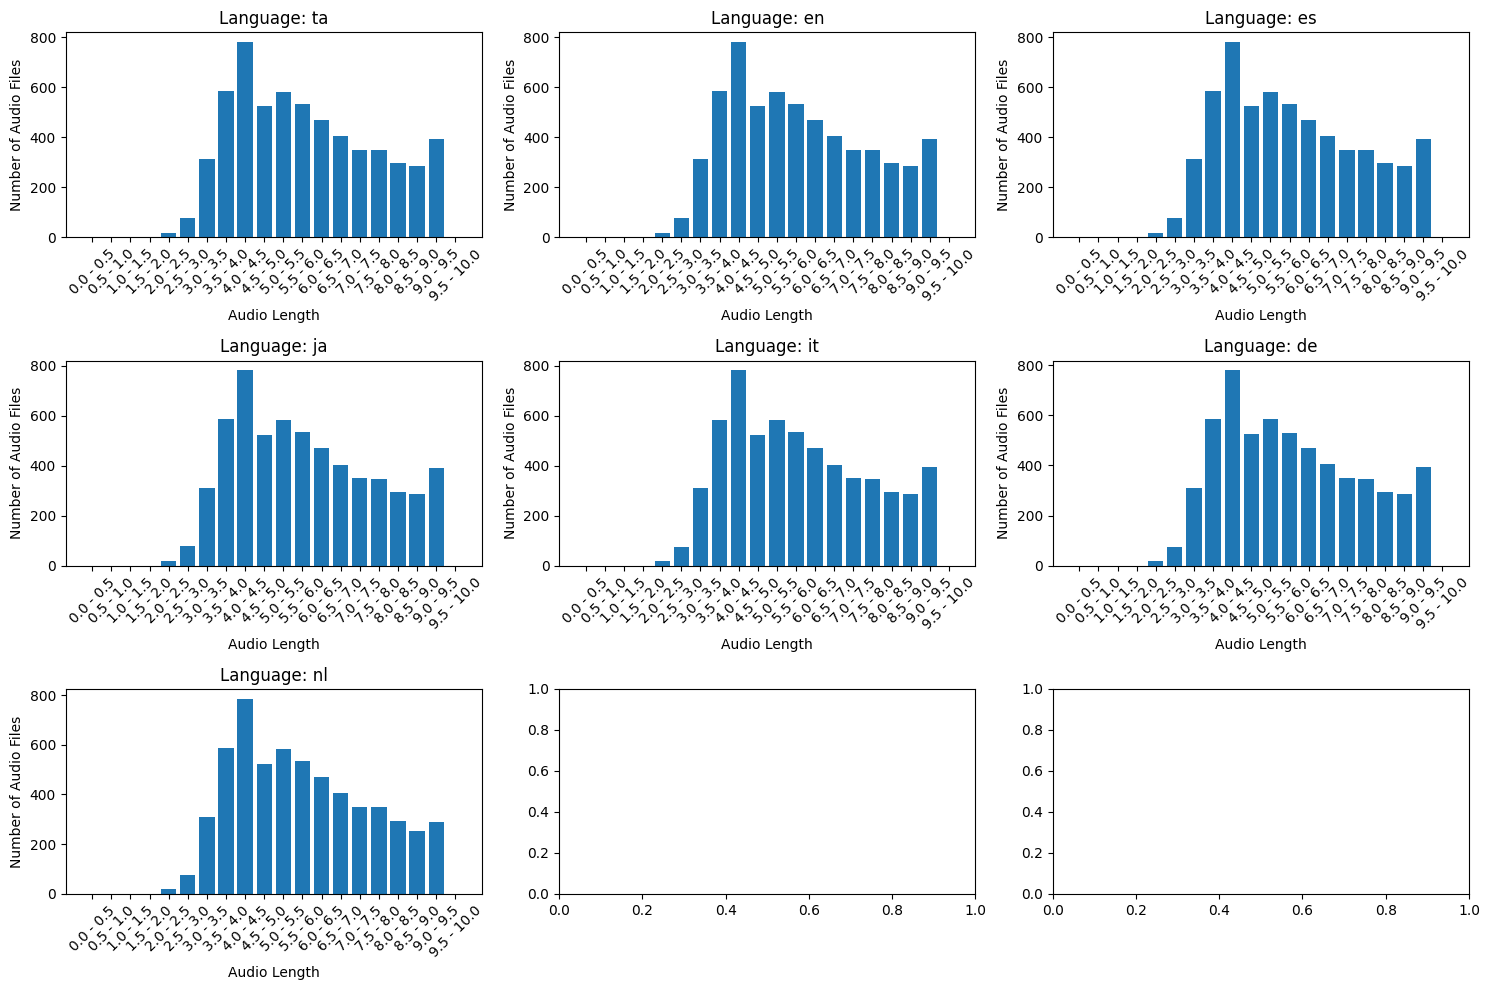

In [14]:
import matplotlib.pyplot as plt

titles = [f'Language: {lang}' for lang in total.keys()]
dataset = [item for _, item in total.items()]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    try:
        keys = list(total['en'].keys())
        values = [len(val) for val in dataset[i].values()]

        ax.bar(keys, values)
        ax.set_title(titles[i])
        ax.set_xlabel('Audio Length')
        ax.set_ylabel('Number of Audio Files')

        ax.tick_params(axis='x', rotation=45)
    
    except IndexError:
        pass
    
plt.tight_layout()
plt.savefig('plots/figures/training_data.pdf')